In [115]:
'''
This notebook is oriented to use a given dataset customized to contains 6 features and training a classification tree
This features are: cqt, rmse, energy, mfccs, chromagram and spectral contrast
This notebook is currently in development phase, so contains a considerably quantity of test code
'''

'\nThis notebook is oriented to use a given dataset customized to contains 6 features and training a classification tree\nThis features are: cqt, rmse, energy, mfccs, chromagram and spectral contrast\nThis notebook is currently in development phase, so contains a considerably quantity of test code\n\n'

In [19]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc
import sklearn.utils
from Datasets.fma.fma import utils

# Reading Audio Data

# features = pd.read_csv('Datasets/2000Spoti.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('Dataframes/var_mean_dict.csv', encoding='latin-1', thousands=',')
# features = pd.read_csv('Dataframes/sliceDataframe/var_mean_dict_10000_Samples.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('Dataframes/ismir04/ismir04_3_sec.csv', encoding='latin-1', thousands=',')
# features = pd.read_csv('Dataframes/ismir04/ismir04_10_sec.csv', encoding='latin-1', thousands=',')
# features = pd.read_csv('Dataframes/ismir04/ismir04_100_sec.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('Dataframes/fma/mfcc_fma.csv', encoding='latin-1', thousands=',')
features = pd.read_csv('Dataframes/fma/fma_features.csv', encoding='latin-1', thousands=',')
# features = pd.read_csv('Dataframes/fma/fma10s.csv', encoding='latin-1', thousands=',')


# ISMIR LABELS DROPING
# features = features.drop(features[features.Genre == 'Electronic'].index)
# features = features.drop(features[features.Genre == 'Punk'].index)
# features = features.drop(features[features.Genre == 'World'].index)

# FMA LABELS DROPING
# features = features.drop(features[features.Genre == 'Experimental'].index)
# features = features.drop(features[features.Genre == 'Instrumental'].index)
# features = features.drop(features[features.Genre == 'International'].index)
# features = features.drop(features[features.Genre == 'Electronic'].index)
# features = features.drop(features[features.Genre == 'Folk'].index)

#extracting labels and features

labelColumn = 'Genre'

labels = np.array(features[labelColumn])
print(np.unique(labels))

print("The labels of out dataset are:", np.unique(labels))
print("And their shape is:", labels.shape)


# FMA

featureColumsToDrop = ['Unnamed: 0', 'Genre', 'MFCCS0']

# Only MFCC withouth 0
            
# featureColumsToDrop = ['Unnamed: 0', 'STFT_Mean.1', 'STFT_Var.1', 'Genre', 'Energy_Mean', 'RMSE_Mean', 'ZCR_Mean', 'CQT_Mean', 
#                            'Spectral_Contrast_Mean', 'Chromagram_Mean', 'Tempo_Mean', 'STFT_Mean', 'MFCCS0',
#                           'Autocorrelation_Mean', 'STFT_Mean', 'Spectral_Centroid_Mean', 'Rolloff_Mean',
#                           'Energy_Var', 'RMSE_Var', 'ZCR_Var', 'CQT_Var', 'Spectral_Contrast_Var', 'Chromagram_Var', 'Tempo_Var', 'STFT_Var',
#                           'Autocorrelation_Var', 'STFT_Var', 'Spectral_Centroid_Var', 'Rolloff_Var']

# Adding more features

# featureColumsToDrop = ['Unnamed: 0', 'STFT_Mean.1', 'STFT_Var.1', 'Genre', 'Energy_Mean', 'CQT_Mean', 
#                            'Spectral_Contrast_Mean', 'Chromagram_Mean', 'Tempo_Mean', 'STFT_Mean', 'MFCCS0',
#                           'Autocorrelation_Mean', 'STFT_Mean', 'Spectral_Centroid_Mean', 'Rolloff_Mean',
#                           'Energy_Var', 'RMSE_Var', 'ZCR_Var', 'CQT_Var', 'Spectral_Contrast_Var', 'Chromagram_Var', 'Tempo_Var', 'STFT_Var',
#                           'Autocorrelation_Var', 'STFT_Var', 'Spectral_Centroid_Var', 'Rolloff_Var']

# ALL

# featureColumsToDrop = ['Unnamed: 0',  'Genre']

# Feture importance ordered

# featureColumsToDrop = ['Unnamed: 0', 'STFT_Mean.1', 'STFT_Var.1', 'Genre',
#                         'Energy_Mean', 'RMSE_Mean', 'ZCR_Mean', 'CQT_Mean', 'Tempo_Mean',
#                         'ZCR_Var', 'Spectral_Contrast_Var','Tempo_Var', 'STFT_Var',
#                         'MFCCS0','MFCCS1','MFCCS2','MFCCS3','MFCCS4','MFCCS5','MFCCS6','MFCCS7',
#                         'MFCCS8','MFCCS9','MFCCS10', 'CQT_Mean','MFCCS11','MFCCS12']

# NO MFCCS

# featureColumsToDrop = ['Unnamed: 0', 'STFT_Mean.1', 'STFT_Var.1', 'Genre','MFCCS0','MFCCS1','MFCCS2','MFCCS3','MFCCS4','MFCCS5','MFCCS6','MFCCS7','MFCCS8','MFCCS9','MFCCS10', 'MFCCS11','MFCCS12']

# TESTING ISMIR

# featureColumsToDrop = ['Unnamed: 0', 'STFT_Mean.1', 'STFT_Var.1', 'Genre', 'Energy_Mean', 'RMSE_Mean', 'ZCR_Mean', 'CQT_Mean', 
#                            'Spectral_Contrast_Mean', 'Chromagram_Mean', 'Tempo_Mean', 'STFT_Mean', 
#                           'Autocorrelation_Mean', 'STFT_Mean', 'Spectral_Centroid_Mean', 'Rolloff_Mean',
#                           'Energy_Var', 'RMSE_Var', 'ZCR_Var', 'Spectral_Contrast_Var', 'Tempo_Var', 'STFT_Var',
#                           'Autocorrelation_Var', 'STFT_Var', 'Spectral_Centroid_Var', 'Rolloff_Var',
#                        'MFCCS0','MFCCS1','MFCCS2','MFCCS3','MFCCS4','MFCCS5','MFCCS6','MFCCS7','MFCCS8','MFCCS9','MFCCS10', 'MFCCS11','MFCCS12']

features = features.drop(featureColumsToDrop, 1)

feature_names = list(features.columns)

print(feature_names)

# features_names = features


print("The features of our dataset are:")

features.head(5)

['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock']
The labels of out dataset are: ['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock']
And their shape is: (8000,)
['ZCR_Mean', 'RMSE_Mean', 'Spectral_Centroid_Mean', 'Spectral_Contrast_Mean', 'Rolloff_Mean', 'MFCCS1', 'MFCCS2', 'MFCCS3', 'MFCCS4', 'MFCCS5', 'MFCCS6', 'MFCCS7', 'MFCCS8', 'MFCCS9', 'MFCCS10', 'MFCCS11', 'MFCCS12']
The features of our dataset are:


C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\ipykernel_launcher.py:95: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,ZCR_Mean,RMSE_Mean,Spectral_Centroid_Mean,Spectral_Contrast_Mean,Rolloff_Mean,MFCCS1,MFCCS2,MFCCS3,MFCCS4,MFCCS5,MFCCS6,MFCCS7,MFCCS8,MFCCS9,MFCCS10,MFCCS11,MFCCS12
0,0.085629,3.188761,1639.583252,18.005175,3267.804688,-163.772964,116.696678,-41.753826,29.144329,-15.050158,18.879372,-8.918165,12.002118,-4.253151,1.359791,-2.683000,-0.794632
1,0.053114,3.251386,1292.958130,17.097452,2773.931885,-205.440491,132.215073,-16.085823,41.514759,-7.642954,16.942802,-5.651261,9.569445,0.503157,8.673513,-8.271377,0.594473
2,0.077515,3.893810,1360.028687,19.177481,2603.491943,-135.864822,157.040085,-53.453247,17.198896,6.868035,13.934344,-11.749298,8.360711,-5.130381,0.233845,-5.421206,1.679479
3,0.052379,2.953848,1232.633789,18.151390,2583.014160,-225.713318,139.332825,-13.097699,44.533356,2.468400,28.328743,-9.931481,10.810857,3.002879,-0.937692,7.138268,-6.625260
4,0.040267,2.576761,941.244141,19.646608,1905.394531,-253.143906,155.716324,-16.636627,23.683815,6.045957,11.692952,-9.947761,6.887814,-3.273322,-6.340906,7.602782,-5.851329


In [20]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import joblib

In [ ]:
tracks = utils.load('Datasets/fma/fma/data/fma_metadata/tracks.csv')
features = utils.load('Datasets/fma/fma/data/fma_metadata/features.csv')
small = tracks['set', 'subset'] <= 'small'

In [21]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier


def train_clasify():
    """
    Method that train a RF Classifier and return a metrics report with
        - Recall by label
        - Precision by label
        - F1-score by label
        - Avg weighted recall
        - Avg weighted precision
        - Avg weighted f1-score
        - Avg macro recall
        - Avg macro precision
        - Avg macro f1-score
        - Avg total accuracy
    """

    # Split the data into training and testing sets (ISMIR AND GTZAM)
    
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)
    
    # FMA Dataset case
    
#     small = tracks['set', 'subset'] <= 'small'

#     train = tracks['set', 'split'] == 'training'
#     val = tracks['set', 'split'] == 'validation'
#     test = tracks['set', 'split'] == 'test'

#     train_features = features.loc[small & train, ['mfcc', 'zcr', 'rmse', 'spectral_centroid', 'spectral_contrast', 'chroma_cens', 'chroma_cqt', 'spectral_rolloff', 'spectral_bandwidth']]
#     train_labels = tracks.loc[small & train, ('track', 'genre_top')]
#     test_features = features.loc[small & test, ['mfcc', 'zcr', 'rmse', 'spectral_centroid', 'spectral_contrast', 'chroma_cens', 'chroma_cqt', 'spectral_rolloff', 'spectral_bandwidth']]
#     test_labels = tracks.loc[small & test, ('track', 'genre_top')]

    # FMA Dataset case
    
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)

    scaler = StandardScaler()
    scaler.fit(train_features)
    scaler.transform(test_features)
    
    # Instantiate model with 1000 decision trees
    rf = RandomForestClassifier(n_estimators = 100)
    
    scores = cross_val_score(rf, train_features, train_labels, cv=3)
    
    # Train the model on training data
    rf.fit(train_features, train_labels)
    
    # Export as dot file
    
#     from sklearn.tree import plot_tree
#     fig = pyplot.gcf()
#     fig.set_size_inches(800, 400)
#     plot_tree(rf.estimators_[0], 
#           feature_names=feature_names,
#           class_names=labels, 
#           filled=True, impurity=True, 
#           rounded=True)
#     fig.savefig('figure_name.pdf')
    
    print("-------------------------------------------")
    print("Metrics info section")
    print("-------------------------------------------")
    
#     print("Scores by fold")
#     print(scores)
    
#     importancia_predictores = pd.DataFrame({
#         'feature':
#         features.columns,
#         'importance':
#         rf.feature_importances_
#     })
#     print("Feature importance in the model")
#     print("-------------------------------------------")
#     print(importancia_predictores.sort_values('importance', ascending=False))

    predictions = rf.predict(test_features)

    report = classification_report(test_labels, predictions, np.unique(test_labels))
    
    # Exporting model     
    joblib.dump(rf, "models/fma_train/rmse_medium.joblib")
    
    return report

# New Train

report = train_clasify()
print(report)

# Recover Stored Model

# rf = joblib.load("models/fma_train/fma_all.joblib")
# scaler = StandardScaler()
# scaler.fit(features)
# features_scaled = scaler.transform(features)
# predictions = rf.predict(features)
# print(predictions)
# report = classification_report(labels, predictions, np.unique(labels))
# print(report)

# rf = joblib.load("models/fma_train/rmse_medium.joblib")
# scaler = StandardScaler()
# predictions = rf.predict(features)
# print(predictions)
# report = classification_report(labels, predictions, np.unique(labels))
# print(report)

Training Features Shape: (6400, 17)
Training Labels Shape: (6400,)
Testing Features Shape: (1600, 17)
Testing Labels Shape: (1600,)
-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.48      0.48      0.48       205
 Experimental       0.46      0.37      0.41       201
         Folk       0.44      0.59      0.50       192
      Hip-Hop       0.44      0.46      0.45       205
 Instrumental       0.54      0.53      0.54       201
International       0.46      0.51      0.49       190
          Pop       0.39      0.24      0.30       209
         Rock       0.55      0.63      0.59       197

     accuracy                           0.47      1600
    macro avg       0.47      0.48      0.47      1600
 weighted avg       0.47      0.47      0.47      1600



C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, test_features, test_labels)
fig = plt.gcf()
fig.set_size_inches(28.5, 28.5)
plt.show()

import junix;
junix.export_images(filepath= "ClassificationTree.ipynb")

NameError: name 'test_features' is not defined

Training Features Shape: (5997, 37)
Training Labels Shape: (5997,)
Testing Features Shape: (2000, 37)
Testing Labels Shape: (2000,)
KFold(n_splits=3, random_state=None, shuffle=True)
(5331,)


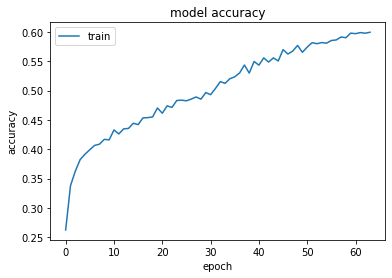

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               19456     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'HipHop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


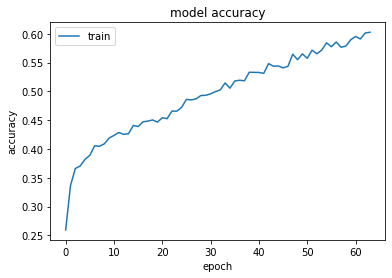

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               19456     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'HipHop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


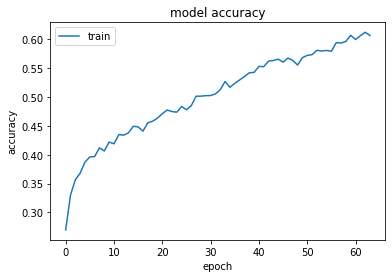

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               19456     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'HipHop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


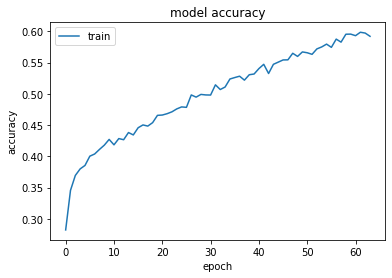

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               19456     
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'HipHop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


ValueError: y contains previously unseen labels: ['Electronic' 'Experimental' 'Folk' 'HipHop' 'Instrumental'
 'International' 'Pop' 'Rock']

In [5]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Conv1D


def train_ann_model(inputs, targets):
    model = keras.models.Sequential()
    
#     , kernel_regularizer = keras.regularizers.l2(0.001)
    
#     model.add(keras.layers.Dropout(0.3, noise_shape = None, seed = None))
    model.add(keras.layers.Dense(512, activation='relu', input_shape=((inputs.shape[1],))))
    model.add(keras.layers.Dropout(0.3, noise_shape = None, seed = None))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.3, noise_shape = None, seed = None))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.3, noise_shape = None, seed = None))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # train
    model_history = model.fit(inputs, targets,
                                epochs=64,
                                batch_size=100,
#                                     validation_split=0.2,
#                                     validation_data=(test_features, test_labels),
                                verbose=False)
    
    #  "Accuracy"
    plt.plot(model_history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    
    model.summary()
    
    return model, model_history

def train_clasify_KFold():
    """
    Method that train a RF Classifier and return a metrics report with
        - Recall by label
        - Precision by label
        - F1-score by label
        - Avg weighted recall
        - Avg weighted precision
        - Avg weighted f1-score
        - Avg macro recall
        - Avg macro recall
        - Avg macro recall
        - Avg total accuracy
    """
    # Encode 
    
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    labels_encoded = label_encoder.transform(labels)

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels_encoded, test_size = 0.25)

    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    
    scaler = StandardScaler()
    scaler.fit(train_features)
    train_features_scaled = scaler.transform(train_features)
    test_features_scaled =  scaler.transform(test_features)
    
    # Merge inputs and targets
    inputs = np.concatenate((train_features_scaled, test_features_scaled), axis=0)
    targets = np.concatenate((train_labels, test_labels), axis=0)
    
    # Define the K-fold Cross Validator
    kfold = KFold(n_splits=3, shuffle=True)

    # K-fold Cross Validation model evaluation
    fold_no = 1
    
    print(kfold)
    
    for train, test in kfold.split(inputs, targets):
        print(train.shape)
        model, history = train_ann_model(inputs[train], targets[train])
        scores = model.evaluate(inputs[test], targets[test], verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
#         acc_per_fold.append(scores[1] * 100)
#         loss_per_fold.append(scores[0])
        
        labels_probabilities = model.predict(inputs[test])
        predictions = labels_probabilities.argmax(axis=-1)
        print('PREDICTIONS', predictions)
        report = classification_report(label_encoder.inverse_transform(targets[test]), 
                                   label_encoder.inverse_transform(predictions), 
                                   label_encoder.inverse_transform(np.unique(labels_encoded)))
        print(report)
        # Increase fold number
        fold_no = fold_no + 1
    return report

def train_clasify():
# Encode 
    
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    labels_encoded = label_encoder.transform(labels)

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels_encoded, test_size = 0.25)

    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    
    scaler = StandardScaler()
    scaler.fit(train_features)
    train_features_scaled = scaler.transform(train_features)
    test_features_scaled =  scaler.transform(test_features)
    
    # Merge inputs and targets
    inputs = np.concatenate((train_features_scaled, test_features_scaled), axis=0)
    targets = np.concatenate((train_labels, test_labels), axis=0)

    model, history = train_ann_model(train_features_scaled, train_labels)
    scores = model.evaluate(test_features_scaled, test_labels, verbose=0)

    labels_probabilities = model.predict(test_features_scaled)
    predictions = labels_probabilities.argmax(axis=-1)
    print('PREDICTIONS', predictions)
    report = classification_report(label_encoder.inverse_transform(test_labels), 
                               label_encoder.inverse_transform(predictions), 
                               label_encoder.inverse_transform(np.unique(labels_encoded)))

    return report, model
    
    
train_clasify_KFold()
report, ann_model = train_clasify()
print(report)

label_encoder = LabelEncoder()
label_encoder.fit(labels)
labels_encoded = label_encoder.transform(labels)

scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

labels_probabilities = ann_model.predict(features_scaled)
predictions = labels_probabilities.argmax(axis=-1)
print('PREDICTIONS', predictions)
report = classification_report(label_encoder.inverse_transform(labels), 
                               label_encoder.inverse_transform(predictions), 
                               label_encoder.inverse_transform(np.unique(labels_encoded)))
# ann_model.history

# plt.plot(ann_model.history['accuracy'])

# matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))


In [11]:
"""
This code was develop in order to implement cross validation at the same time that store the metrics avg in csvs to subsequents revies
"""
labels_tags = ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']

def get_metrics(report, tag, start_point = 7):
    """
    Method that extract metrics from the string table returned by the classification_report method from sklearn package
    """
    if start_point == 7:
        start_point = start_point + len(tag)
        
    avg_precision = report[report.index(tag)+start_point:report.index(tag)+start_point+4]
    avg_recall = report[report.index(tag)+start_point+10:report.index(tag)+start_point+10+4]
    avg_f1_score = report[report.index(tag)+start_point+20:report.index(tag)+start_point+20+4]
    return avg_precision, avg_recall, avg_f1_score

def get_metrics_avg(number_iterations, labels):
    """
    Method that make number_iterations training a RF classifier and return 2 dictionaires with metics
    
        - One with metrics by genre label
        - The other with total metrics of all the genre labels
    """
    macro_avg_precision_array = np.arange(number_iterations).astype(np.float32)
    macro_avg_recall_array = np.arange(number_iterations).astype(np.float32)
    macro_avg_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    weighted_avg_precision_array = np.arange(number_iterations).astype(np.float32)
    weighted_avg_recall_array = np.arange(number_iterations).astype(np.float32)
    weighted_avg_f1_score_array = np.arange(number_iterations).astype(np.float32)
    
    accuracy_avg_array = np.arange(number_iterations).astype(np.float32)
    
    # Loop with the training RF classiffier itrerations. We fill the arrays metrics in each iteration     
    
    # Dicts initialization to store by label metrics results
    precision_dict = {}
    recall_dict = {}
    f1_score_dict = {}
    for label in labels:
        precision_dict[label] = np.arange(number_iterations).astype(np.float32)
        recall_dict[label] = np.arange(number_iterations).astype(np.float32)
        f1_score_dict[label] = np.arange(number_iterations).astype(np.float32)
    
    # Training iterations and metric store in dicts
    for i in range(0, number_iterations):
        report = train_clasify()
        print(report)
        
        # Metrics by Genre
        for label in labels:
            print(label)
            (precision, recall, f1_score) = get_metrics(report, label)
            precision_dict[label][i] = precision
            recall_dict[label][i] = recall
            f1_score_dict[label][i] = f1_score
        
        # General metrics         
        (precision, recall, f1_score) = get_metrics(report, "accuracy", 15)
        accuracy_avg_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "weighted", 19)
        weighted_avg_precision_array[i] = precision
        weighted_avg_recall_array[i] = recall
        weighted_avg_f1_score_array[i] = f1_score
        
        (precision, recall, f1_score) = get_metrics(report, "macro avg", 16)
        macro_avg_precision_array[i] = precision
        macro_avg_recall_array[i] = recall
        macro_avg_f1_score_array[i] = f1_score
        
    # Now we fill the arrays that we are going to use to create the final dictionaries     
    precision_array = []
    recall_array = []
    f1_score_array = []
    
    for label in labels:
        precision_array.append(precision_dict[label].mean())
        recall_array.append(recall_dict[label].mean())
        f1_score_array.append(f1_score_dict[label].mean())
    
    # Dictionaries creation     
    by_label_metrics_dict = {
        
        'Genre': labels,
        'avg_precision': precision_array,
        'avg_recall': recall_array,
        'avg_f1_score': f1_score_array,
        
    }
    
    total_metrics_dict = {
        
        'avg_accuracy': accuracy_avg_array.mean(),
        
        'weighted_avg_precision': weighted_avg_precision_array.mean(),
        'weighted_avg_recall': weighted_avg_recall_array.mean(),
        'weighted_avg_f1_score': weighted_avg_f1_score_array.mean(),
        
        'macro_avg_precision': macro_avg_precision_array.mean(),
        'macro_avg_recall': macro_avg_recall_array.mean(),
        'macro_avg_f1_score': macro_avg_f1_score_array.mean(),
        
    }

    return by_label_metrics_dict, total_metrics_dict


def export_genre_result_dict_to_csv(by_label_metrics_dict, total_metrics_dict):
    """
    Method that export two dictionaries to csv files using pandas dataframes
    
        - One with metrics by genre label
        - The other with total metrics of all the genre labels
    """
    by_label_metrics_dataframe_columns_tags = ['Genre', 'avg_precision', 'avg_recall', 'avg_f1_score']
    total_metrics_dataframe_columns_tags = ['avg_accuracy', 
                                            'weighted_avg_precision', 'weighted_avg_recall', 'weighted_avg_f1_score',
                                            'macro_avg_precision', 'macro_avg_recall', 'macro_avg_f1_score'
                                           ]

    df_by_label = pd.DataFrame(by_label_metrics_dict, columns = by_label_metrics_dataframe_columns_tags)
    df_total = pd.DataFrame(total_metrics_dict, columns = total_metrics_dataframe_columns_tags, index=[0])

    df_by_label.to_csv('metrics/FMA/RF/fma_features/only_zcr_by_label.csv')
    df_total.to_csv('metrics/FMA/RF/fma_features/only_zcr_total.csv')

(by_label_metrics_dict, total_metrics_dict) = get_metrics_avg(10, labels_tags)
export_genre_result_dict_to_csv(by_label_metrics_dict, total_metrics_dict)

Training Features Shape: (6400, 7)
Training Labels Shape: (6400,)
Testing Features Shape: (800, 7)
Testing Labels Shape: (800,)
-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.35      0.38      0.36       100
 Experimental       0.24      0.18      0.21       100
         Folk       0.15      0.18      0.16       100
      Hip-Hop       0.30      0.29      0.29       100
 Instrumental       0.25      0.22      0.23       100
International       0.16      0.12      0.14       100
          Pop       0.19      0.23      0.21       100
         Rock       0.32      0.37      0.35       100

     accuracy                           0.25       800
    macro avg       0.25      0.25      0.24       800
 weighted avg       0.25      0.25      0.24       800

Electronic
Experimental
Folk
Hip-Hop
Instrumental
International
Pop
Rock
Training Features Shape: (6

C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.31      0.34      0.33       100
 Experimental       0.19      0.13      0.15       100
         Folk       0.17      0.20      0.18       100
      Hip-Hop       0.31      0.31      0.31       100
 Instrumental       0.26      0.23      0.24       100
International       0.21      0.18      0.20       100
          Pop       0.16      0.18      0.17       100
         Rock       0.30      0.34      0.32       100

     accuracy                           0.24       800
    macro avg       0.24      0.24      0.24       800
 weighted avg       0.24      0.24      0.24       800

Electronic
Experimental
Folk
Hip-Hop
Instrumental
International
Pop
Rock
Training Features Shape: (6400, 7)
Training Labels Shape: (6400,)
Testing Features Shape: (800, 7)
Testing Labels Shape: (800,)


C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.32      0.35      0.33       100
 Experimental       0.27      0.19      0.22       100
         Folk       0.17      0.21      0.19       100
      Hip-Hop       0.34      0.34      0.34       100
 Instrumental       0.30      0.25      0.27       100
International       0.14      0.11      0.12       100
          Pop       0.16      0.19      0.17       100
         Rock       0.31      0.35      0.33       100

     accuracy                           0.25       800
    macro avg       0.25      0.25      0.25       800
 weighted avg       0.25      0.25      0.25       800

Electronic
Experimental
Folk
Hip-Hop
Instrumental
International
Pop
Rock
Training Features Shape: (6400, 7)
Training Labels Shape: (6400,)
Testing Features Shape: (800, 7)
Testing Labels Shape: (800,)


C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.31      0.35      0.33       100
 Experimental       0.15      0.10      0.12       100
         Folk       0.17      0.19      0.18       100
      Hip-Hop       0.38      0.40      0.39       100
 Instrumental       0.22      0.20      0.21       100
International       0.16      0.13      0.15       100
          Pop       0.15      0.17      0.16       100
         Rock       0.30      0.34      0.32       100

     accuracy                           0.23       800
    macro avg       0.23      0.24      0.23       800
 weighted avg       0.23      0.23      0.23       800

Electronic
Experimental
Folk
Hip-Hop
Instrumental
International
Pop
Rock
Training Features Shape: (6400, 7)
Training Labels Shape: (6400,)
Testing Features Shape: (800, 7)
Testing Labels Shape: (800,)


C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.28      0.31      0.29       100
 Experimental       0.19      0.13      0.15       100
         Folk       0.16      0.17      0.16       100
      Hip-Hop       0.33      0.35      0.34       100
 Instrumental       0.29      0.27      0.28       100
International       0.17      0.14      0.16       100
          Pop       0.15      0.17      0.16       100
         Rock       0.32      0.38      0.35       100

     accuracy                           0.24       800
    macro avg       0.24      0.24      0.24       800
 weighted avg       0.24      0.24      0.24       800

Electronic
Experimental
Folk
Hip-Hop
Instrumental
International
Pop
Rock
Training Features Shape: (6400, 7)
Training Labels Shape: (6400,)
Testing Features Shape: (800, 7)
Testing Labels Shape: (800,)


C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.28      0.27      0.27       100
 Experimental       0.17      0.14      0.16       100
         Folk       0.17      0.21      0.19       100
      Hip-Hop       0.31      0.32      0.31       100
 Instrumental       0.29      0.25      0.27       100
International       0.15      0.12      0.13       100
          Pop       0.16      0.18      0.17       100
         Rock       0.33      0.38      0.35       100

     accuracy                           0.23       800
    macro avg       0.23      0.23      0.23       800
 weighted avg       0.23      0.23      0.23       800

Electronic
Experimental
Folk
Hip-Hop
Instrumental
International
Pop
Rock
Training Features Shape: (6400, 7)
Training Labels Shape: (6400,)
Testing Features Shape: (800, 7)
Testing Labels Shape: (800,)


C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.31      0.34      0.33       100
 Experimental       0.18      0.13      0.15       100
         Folk       0.13      0.16      0.14       100
      Hip-Hop       0.33      0.37      0.35       100
 Instrumental       0.27      0.22      0.24       100
International       0.19      0.14      0.16       100
          Pop       0.19      0.22      0.21       100
         Rock       0.28      0.33      0.30       100

     accuracy                           0.24       800
    macro avg       0.24      0.24      0.24       800
 weighted avg       0.24      0.24      0.24       800

Electronic
Experimental
Folk
Hip-Hop
Instrumental
International
Pop
Rock
Training Features Shape: (6400, 7)
Training Labels Shape: (6400,)
Testing Features Shape: (800, 7)
Testing Labels Shape: (800,)


C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.32      0.38      0.35       100
 Experimental       0.21      0.14      0.17       100
         Folk       0.14      0.17      0.15       100
      Hip-Hop       0.34      0.32      0.33       100
 Instrumental       0.26      0.22      0.24       100
International       0.17      0.12      0.14       100
          Pop       0.16      0.19      0.17       100
         Rock       0.31      0.37      0.34       100

     accuracy                           0.24       800
    macro avg       0.24      0.24      0.24       800
 weighted avg       0.24      0.24      0.24       800

Electronic
Experimental
Folk
Hip-Hop
Instrumental
International
Pop
Rock
Training Features Shape: (6400, 7)
Training Labels Shape: (6400,)
Testing Features Shape: (800, 7)
Testing Labels Shape: (800,)


C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.29      0.34      0.31       100
 Experimental       0.21      0.15      0.17       100
         Folk       0.17      0.19      0.18       100
      Hip-Hop       0.32      0.33      0.33       100
 Instrumental       0.31      0.29      0.30       100
International       0.18      0.14      0.16       100
          Pop       0.16      0.18      0.17       100
         Rock       0.32      0.37      0.34       100

     accuracy                           0.25       800
    macro avg       0.25      0.25      0.25       800
 weighted avg       0.25      0.25      0.25       800

Electronic
Experimental
Folk
Hip-Hop
Instrumental
International
Pop
Rock
Training Features Shape: (6400, 7)
Training Labels Shape: (6400,)
Testing Features Shape: (800, 7)
Testing Labels Shape: (800,)


C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


-------------------------------------------
Metrics info section
-------------------------------------------
               precision    recall  f1-score   support

   Electronic       0.34      0.34      0.34       100
 Experimental       0.17      0.13      0.15       100
         Folk       0.17      0.22      0.19       100
      Hip-Hop       0.32      0.33      0.33       100
 Instrumental       0.32      0.25      0.28       100
International       0.16      0.13      0.15       100
          Pop       0.15      0.18      0.16       100
         Rock       0.29      0.33      0.31       100

     accuracy                           0.24       800
    macro avg       0.24      0.24      0.24       800
 weighted avg       0.24      0.24      0.24       800

Electronic
Experimental
Folk
Hip-Hop
Instrumental
International
Pop
Rock


C:\Users\alvar\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=['Electronic' 'Experimental' 'Folk' 'Hip-Hop' 'Instrumental'
 'International' 'Pop' 'Rock'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
